In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path

## Import CSV

In [2]:
# 1. Create a DataFrame for the Presidential Election data. 
file_to_open = ("election_groups.csv")
ml_df = pd.read_csv(file_to_open,  encoding="ISO-8859-1")
ml_df.head()

,Voter_ID,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
0,704844,SEVEN HILLS,44131,NOPTY,1959,0,t,D,t,0,t,D,t,Boomers
1,1658758,PARMA,44130,REP,1968,0,t,R,t,R,t,D,t,Generation X
2,2005536,BROADVIEW HTS,44147,REP,1976,0,t,R,t,R,t,D,t,Generation X
3,2465762,SOLON,44139,NOPTY,1991,0,f,0,f,0,t,0,f,Millennials
4,710633,INDEPENDENCE,44131,REP,1968,0,t,R,t,R,t,0,t,Generation X


## Data Cleaning

In [3]:
#Replace True and False Values with 0 and 1
ml_df.replace(('f', 't'), (0, 1), inplace=True)

In [4]:
ml_df.shape

(870075, 14)

In [5]:
#Column Datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870075 entries, 0 to 870074
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Voter_ID               870075 non-null  int64 
 1   City                   870075 non-null  object
 2   Zip_Code               870075 non-null  int64 
 3   Party                  870075 non-null  object
 4   Birth_Year             870075 non-null  int64 
 5   Primary_Election_2020  870075 non-null  object
 6   General_Election_2020  870075 non-null  int64 
 7   Primary_Election_2016  870075 non-null  object
 8   General_Election_2016  870075 non-null  int64 
 9   Primary_Election_2012  870075 non-null  object
 10  General_Election_2012  870075 non-null  int64 
 11  Primary_Election_2008  870075 non-null  object
 12  General_Election_2008  870075 non-null  int64 
 13  Generational_Group     870075 non-null  object
dtypes: int64(7), object(7)
memory usage: 92.9+ MB


In [6]:
# Set voter_id_org column as index
ml_df =ml_df.set_index('Voter_ID')

In [ ]:
# Hand categorical data
# code primary election data into integers
#D is Democrat, R is Republican, L is Libertarian, G is Green, 0, " ", X and N is non-party, issues only ballot


In [8]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
ml_df['Primary_Election_2016'] = ml_df['Primary_Election_2016'].apply(lambda x:party[x])
ml_df['Primary_Election_2012'] = ml_df['Primary_Election_2012'].apply(lambda x:party[x])
ml_df['Primary_Election_2008'] = ml_df['Primary_Election_2008'].apply(lambda x:party[x])
ml_df['Primary_Election_2020'] = ml_df['Primary_Election_2020'].apply(lambda x:party[x])


In [9]:
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,NOPTY,1959,3,1,0,1,3,1,0,1,Boomers
1658758,PARMA,44130,REP,1968,3,1,1,1,1,1,0,1,Generation X
2005536,BROADVIEW HTS,44147,REP,1976,3,1,1,1,1,1,0,1,Generation X
2465762,SOLON,44139,NOPTY,1991,3,0,3,0,3,1,3,0,Millennials
710633,INDEPENDENCE,44131,REP,1968,3,1,1,1,1,1,3,1,Generation X


In [10]:
ml_df["Party"].unique()

array(['NOPTY', 'REP', 'DEM', 'GRE', 'LIB'], dtype=object)

In [11]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
ml_df["Party"] = ml_df["Party"].apply(lambda x:P_ID[x])
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Group
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,3,1959,3,1,0,1,3,1,0,1,Boomers
1658758,PARMA,44130,1,1968,3,1,1,1,1,1,0,1,Generation X
2005536,BROADVIEW HTS,44147,1,1976,3,1,1,1,1,1,0,1,Generation X
2465762,SOLON,44139,3,1991,3,0,3,0,3,1,3,0,Millennials
710633,INDEPENDENCE,44131,1,1968,3,1,1,1,1,1,3,1,Generation X


In [48]:
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millenials": 4, "Generation Z": 5}
ml_df["Generational_Groups"] = ml_df["Generational_Groups"].apply(lambda x:group[x])
ml_df.head()

,City,Zip_Code,Party,Birth_Year,Primary_Election_2020,General_Election_2020,Primary_Election_2016,General_Election_2016,Primary_Election_2012,General_Election_2012,Primary_Election_2008,General_Election_2008,Generational_Groups
Voter_ID,,,,,,,,,,,,,
704844,1,44131,3,1959,3,1,0,1,3,1,0,1,2
1658758,2,44130,1,1968,3,1,1,1,1,1,0,1,3
2005536,3,44147,1,1976,3,1,1,1,1,1,0,1,3
2465762,4,44139,3,1991,3,0,3,0,3,1,3,0,4
710633,5,44131,1,1968,3,1,1,1,1,1,3,1,3


In [49]:
ml_df["City"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58])

In [52]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

ml_df["City"] = ml_df["City"].apply(lambda x:cities[x])


In [51]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870075 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   City                   870075 non-null  int64   
 1   Zip_Code               870075 non-null  int64   
 2   Party                  870075 non-null  int64   
 3   Birth_Year             870075 non-null  int64   
 4   Primary_Election_2020  870075 non-null  int64   
 5   General_Election_2020  870075 non-null  int64   
 6   Primary_Election_2016  870075 non-null  int64   
 7   General_Election_2016  870075 non-null  int64   
 8   Primary_Election_2012  870075 non-null  int64   
 9   General_Election_2012  870075 non-null  int64   
 10  Primary_Election_2008  870075 non-null  int64   
 11  General_Election_2008  870075 non-null  int64   
 12  Generational_Groups    870075 non-null  category
dtypes: category(1), int64(12)
memory usage: 87.1 MB


In [53]:
ml_df["Birth_Year"].value_counts()

1990    18098
1991    18025
1992    17816
1993    17563
1989    17524
        ...  
1931     2071
1930     1877
2004     1567
1929     1459
1928     1234
Name: Birth_Year, Length: 77, dtype: int64

In [54]:
corr_matrix = ml_df.corr()
corr_matrix['General_Election_2020'].sort_values(ascending=False)

General_Election_2020    1.000000
General_Election_2016    0.434058
General_Election_2012    0.340591
General_Election_2008    0.335148
City                     0.109691
Zip_Code                 0.051428
Primary_Election_2012   -0.241401
Birth_Year              -0.279956
Primary_Election_2008   -0.287192
Primary_Election_2020   -0.306218
Primary_Election_2016   -0.335290
Party                   -0.389422
Name: General_Election_2020, dtype: float64

In [55]:
# Calculate the percent voting by City during 2020 Election.
per_city= ml_df.groupby(["City"]).mean()["General_Election_2020"]*100
per_city

City
1     81.608154
2     73.561847
3     78.779009
4     81.140451
5     85.096565
6     66.864696
7     72.391677
8     63.959750
9     55.112270
10    80.988781
11    79.794409
12    83.916084
13    84.975051
14    64.378409
15    50.058502
16    67.875820
17    78.303649
18    85.876043
19    63.724971
20    82.075091
21    75.049581
22    76.277460
23    79.831382
24    74.610427
25    78.879323
27    70.823146
28    78.317001
29    75.465733
30    83.234127
31    74.817203
32    68.431896
33    77.107818
34    85.034642
35    68.376262
36    69.693349
37    76.758180
38    76.959950
39    78.944693
40    80.406759
41    85.688730
42    62.841016
43    84.670882
44    84.692180
45    84.228769
46    72.749392
47    85.622179
48    84.481394
49    83.776596
50    77.668309
51    78.402107
52    82.022472
53    84.028892
54    68.972746
55    72.745098
56    67.394696
57    41.666667
58    78.378378
Name: General_Election_2020, dtype: float64

In [56]:
ml_df[["City", "General_Election_2020"]].groupby(["City"], as_index=True).mean().sort_values(by="General_Election_2020", ascending=False)


,General_Election_2020
City,
18,0.858760
41,0.856887
47,0.856222
5,0.850966
34,0.850346
13,0.849751
44,0.846922
43,0.846709
48,0.844814


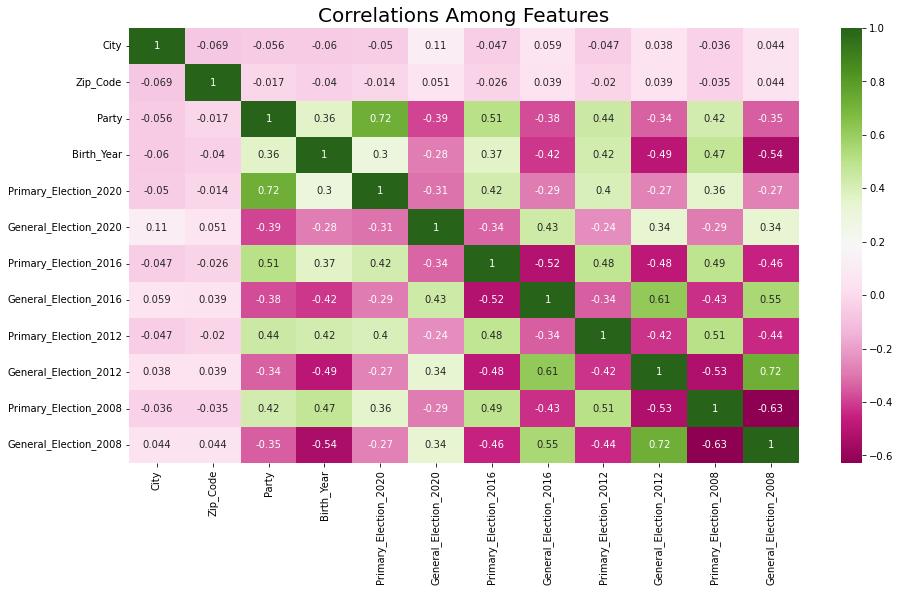

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (15,8))
sb.heatmap(ml_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [58]:
ml_2020 = ml_df[['City', 'Zip_Code', 'Party', 'Birth_Year', 'General_Election_2020', 'Primary_Election_2020', 'Generational_Groups']].copy()
ml_2020.head()

,City,Zip_Code,Party,Birth_Year,General_Election_2020,Primary_Election_2020,Generational_Groups
Voter_ID,,,,,,,
704844,1,44131,3,1959,1,3,2
1658758,2,44130,1,1968,1,3,3
2005536,3,44147,1,1976,1,3,3
2465762,4,44139,3,1991,0,3,4
710633,5,44131,1,1968,1,3,3


In [59]:
ml_2020 = ml_2020[ml_2020['Birth_Year'] <= 2002]
ml_2020['Birth_Year'].describe()

count    864312.000000
mean       1971.875392
std          18.360409
min        1928.000000
25%        1957.000000
50%        1972.000000
75%        1988.000000
max        2002.000000
Name: Birth_Year, dtype: float64

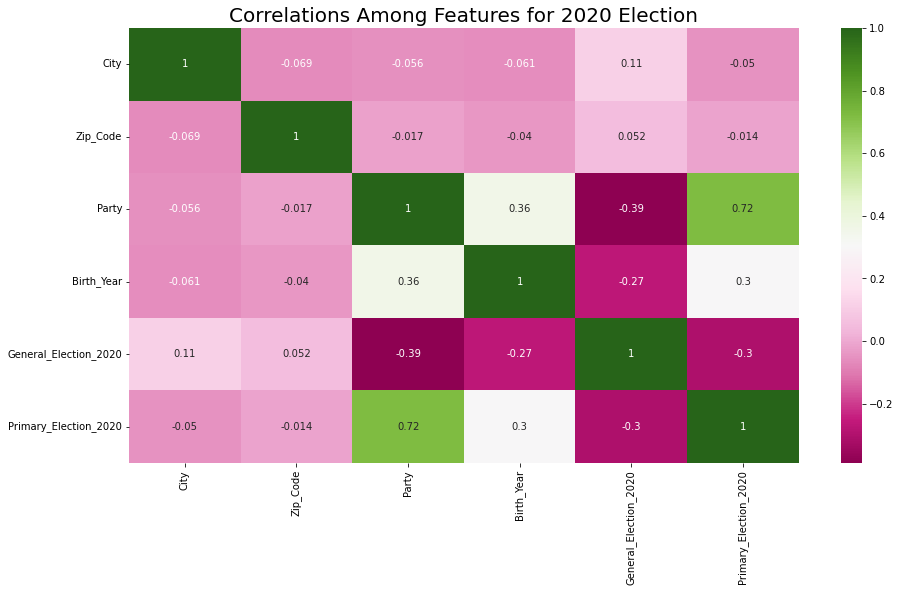

In [60]:
plt.subplots(figsize = (15,8))
sb.heatmap(ml_2020.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features for 2020 Election", fontsize = 20);

In [61]:
ml_2016 = ml_df[ml_df['Birth_Year'] <= 1998]
ml_2016['Birth_Year'].describe()

count    820467.000000
mean       1970.352997
std          17.588824
min        1928.000000
25%        1957.000000
50%        1971.000000
75%        1986.000000
max        1998.000000
Name: Birth_Year, dtype: float64

In [62]:
ml_2016 = ml_2016[['City', 'Zip_Code', 'Party', 'Birth_Year', 'General_Election_2020', 'Primary_Election_2020',  'General_Election_2016', 'Primary_Election_2016', 'Generational_Groups']].copy()
ml_2016.head()

,City,Zip_Code,Party,Birth_Year,General_Election_2020,Primary_Election_2020,General_Election_2016,Primary_Election_2016,Generational_Groups
Voter_ID,,,,,,,,,
704844,1,44131,3,1959,1,3,1,0,2
1658758,2,44130,1,1968,1,3,1,1,3
2005536,3,44147,1,1976,1,3,1,1,3
2465762,4,44139,3,1991,0,3,0,3,4
710633,5,44131,1,1968,1,3,1,1,3


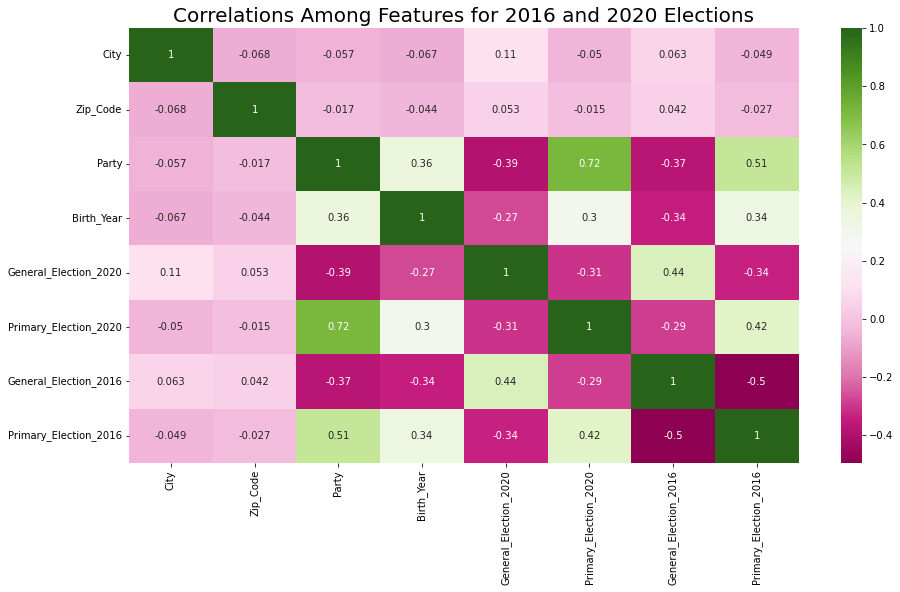

In [63]:
plt.subplots(figsize = (15,8))
sb.heatmap(ml_2016.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features for 2016 and 2020 Elections", fontsize = 20);

In [ ]:
# plt.subplots(figsize = (15,8))
# sb.barplot(x = "City", y = per_city, data=ml_df, edgecolor=(0,0,0), linewidth=2)
# # plt.title("Voting By City Distribution", fontsize = 15)
# # plt.ylabel("2020_General_Election", fontsize = 15)
# # plt.xlabel("Cities",fontsize = 15)
# # plt.xticks("City")

# Machine Learning on 2020 election - Voters Born 1928-2002

In [64]:
x = ml_2020.drop("General_Election_2020",axis=1)
y = ml_2020["General_Election_2020"]

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings(action='ignore')


classifiers = [
    
    RandomForestClassifier(n_estimators=100, max_features=3),
    GradientBoostingClassifier(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [66]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(x, y):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

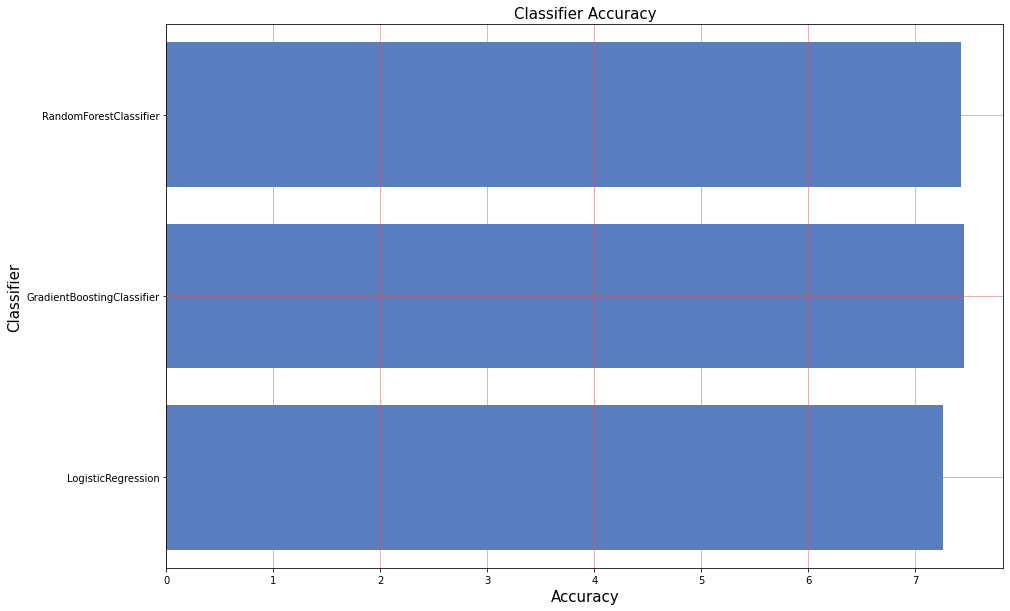

In [67]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2]])
%matplotlib inline
sb.set_color_codes("muted")
ax=plt.subplots(figsize=(15,10))
ax=sb.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=15)


In [68]:
log['Accuracy'].sort_values(ascending=False)

1    7.450616
0    7.430222
2    7.256516
Name: Accuracy, dtype: float64

In [69]:
log['Classifier']

0        RandomForestClassifier
1    GradientBoostingClassifier
2            LogisticRegression
Name: Classifier, dtype: object

## From above results we can say that gradient boosting classifier gave the best result for our dataset

In [70]:
classifier = GradientBoostingClassifier()

In [71]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [72]:
score 


0.7448560937308079

## Confusion Matrices

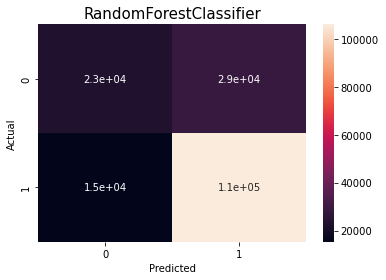

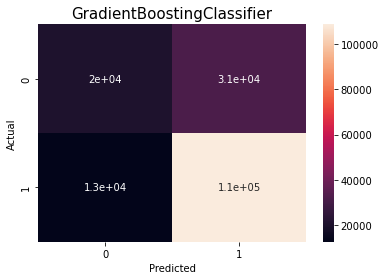

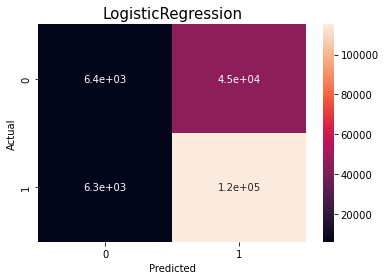

In [73]:
for classifier in classifiers:
    

    classifier.fit(X_train,Y_train)

    p_vals = classifier.predict(X_test)

    confusion_matrix = pd.crosstab(Y_test, p_vals, rownames=['Actual'], colnames=['Predicted'])

    sb.heatmap(confusion_matrix, annot=True)
    plt.title( classifier.__class__.__name__,fontsize=15)
    plt.show()